In [ ]:
from google.colab import files
import pandas as pd

# Upload dataset
uploaded = files.upload()

# Load dataset
df = pd.read_csv("heart.csv")

print("Initial Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

# Data Cleaning
df = df.drop_duplicates()
df = df.dropna()

print("\nShape after cleaning:", df.shape)

# Preview cleaned data
df.head()


Saving heart.csv to heart.csv
Initial Shape: (1025, 14)

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Shape after cleaning: (302, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Decision Tree Accuracy: 0.7377049180327869

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76        32
           1       0.74      0.69      0.71        29

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



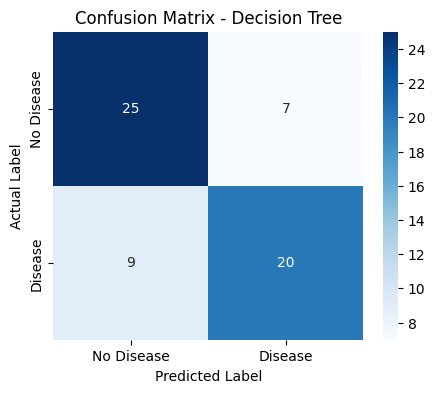

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Features and target
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_dt, annot=True, fmt="d", cmap="Blues",
    xticklabels=["No Disease", "Disease"],
    yticklabels=["No Disease", "Disease"]
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


Random Forest Accuracy: 0.8360655737704918

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



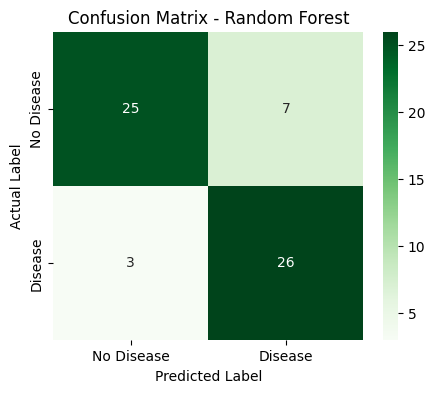

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_rf, annot=True, fmt="d", cmap="Greens",
    xticklabels=["No Disease", "Disease"],
    yticklabels=["No Disease", "Disease"]
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()
